<a href="https://colab.research.google.com/github/pantShubham95/DAV-6150/blob/main/Project3/S_Pant_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 3: Neural Network Using Fast.AI**

## <center><b>Shubham Pant<b></center></b>

In [2]:
# Installing all necessary libraries
!pip install fastbook
!pip install duckduckgo-images-api
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [18]:
# # This is just for updating our google colab drive
# import shutil

# # Specify the directory path you want to delete
# directory_path = '/content/happy_or_not'  # Replace 'directory_name' with the name of your directory

# # Use shutil.rmtree() to delete the directory and all its contents
# shutil.rmtree(directory_path)

In [4]:
# importing libraries

from fastbook import *
from time import sleep
from sklearn.metrics import accuracy_score

### Creating Sample Using Duck-Duck-Go
Below we are extracting the images from using duck-duck-go search engine. I have collected only two emotion, one is happy and second is sad.

In [5]:
from sklearn.model_selection import train_test_split

emotion_list = ['happy', 'sad']
train_path = Path('happy_or_not/train')
# train_path.mkdir(exist_ok=True, parents=True)

test_path = Path('happy_or_not/test')
# test_path.mkdir(exist_ok=True, parents=True)

for emot in emotion_list:
    dest_train = train_path / emot
    dest_train.mkdir(exist_ok=True, parents=True)
    dest_test = test_path / emot
    dest_test.mkdir(exist_ok=True, parents=True)

    urls1 = search_images_ddg(f'{emot} face')[:250]
    urls2 = search_images_ddg(f'{emot} human face')[:250]

    # Split URLs into training and test sets
    train_urls1, test_urls1 = train_test_split(urls1, test_size=0.2, random_state=42)
    train_urls2, test_urls2 = train_test_split(urls2, test_size=0.2, random_state=42)

    # Download and save images for training set
    download_images(dest_train, urls=train_urls1)
    download_images(dest_train, urls=train_urls2)
    sleep(10)  # Pause between searches to avoid over-loading server

    # Download and save images for test set
    download_images(dest_test, urls=test_urls1)
    download_images(dest_test, urls=test_urls2)
    sleep(10)

    # Resize images for training and test set
    resize_images(train_path / emot, max_size=400, dest=train_path / emot)
    resize_images(test_path / emot, max_size=400, dest=test_path / emot)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [6]:
# finding and removing images which are not in correct format
path = Path('happy_or_not/train')

trash_image = verify_images(get_image_files(path))
trash_image.map(Path.unlink)
len(trash_image)

11

Above code is removing the image which is not in correct  format, we can see that there are 100 image from the train set

In [7]:
# creating blocks and labeling with it category

data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
)
dls = data_block.dataloaders(path)

We are creating datablock and it consists of images (ImageBlock) and their corresponding category labels (CategoryBlock), also processing it by resizing it and also splitted into 80% of train and 20% in test set.

In [8]:
# Get the lengths of the training and validation datasets
train_size = len(dls.train.dataset)
valid_size = len(dls.valid.dataset)

# Calculate the total dataset size
total_dataset_size = train_size + valid_size

print("Total dataset size:", total_dataset_size)
print("Total Train dataset size:", train_size)
print("Total Valid dataset size:", valid_size)


Total dataset size: 584
Total Train dataset size: 468
Total Valid dataset size: 116


In [9]:
# building model on blocks
emot_learner = vision_learner(dls, resnet34, metrics=error_rate)
emot_learner.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 145MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.239849,0.807944,0.379310,02:12


epoch,train_loss,valid_loss,error_rate,time
0,0.788316,0.582567,0.241379,03:03
1,0.606768,0.551924,0.258621,03:02
2,0.465684,0.513724,0.224138,03:03


We have take fine tune as 3 because we have only 576 images and we do not want our model to be overfitting.

Also, we can see that our train_loss and valid_loss both are decreasing which signify that we have a balanced in both losses. If valid_loss signicantly increases it signify that out model is getting overfitted.


Accuracy: 0.7758620689655172


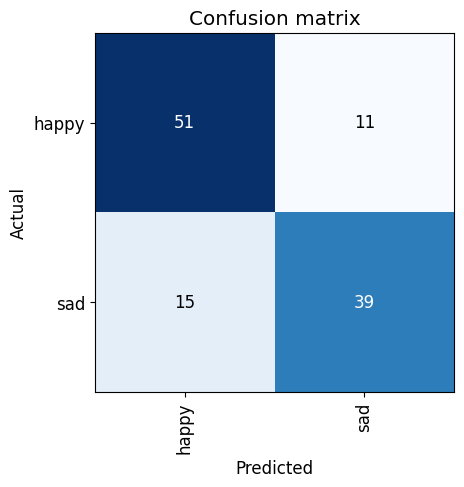

In [10]:
# Step 7: printing confusion matrix
interp = ClassificationInterpretation.from_learner(emot_learner)
interp.plot_confusion_matrix()

# Get predictions and true labels
preds, targets = emot_learner.get_preds()

# Convert predictions and targets to numpy arrays
preds = preds.argmax(dim=-1).numpy()
targets = targets.numpy()

# Calculate accuracy
accuracy = accuracy_score(targets, preds)
print(f"Accuracy: {accuracy}")

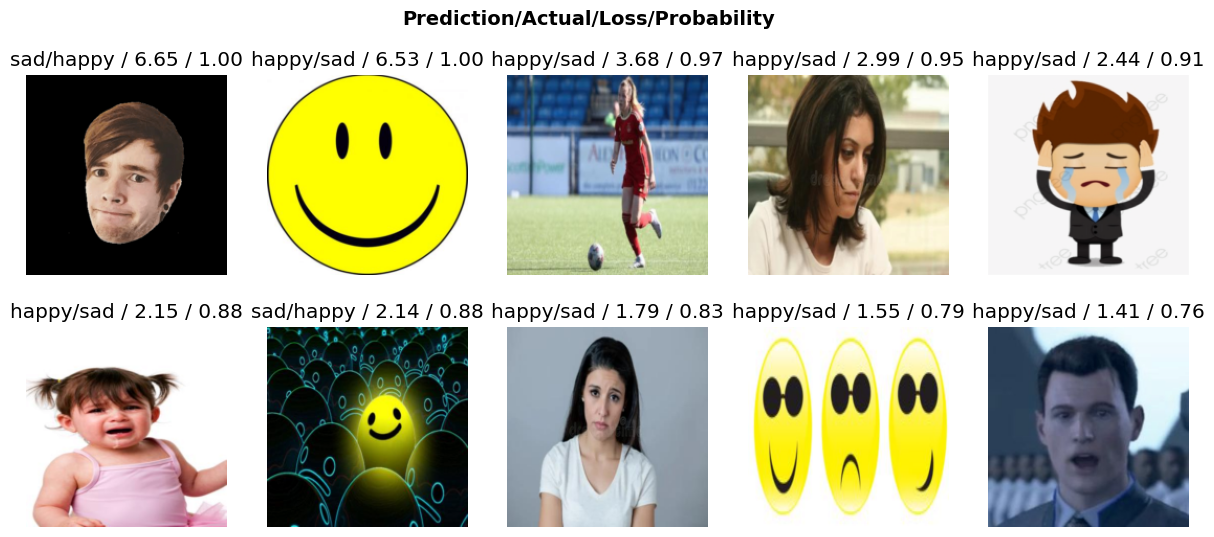

In [11]:
interp.plot_top_losses(10, nrows=2)

Above we got accuracy of approx. 77.58%

## Exporting Model

In [12]:
# Example path in Google Drive
emot_learner.export("/content/drive/MyDrive/Model/emot_learner.pkl")

In [13]:
emot_learner = load_learner("/content/drive/MyDrive/Model/emot_learner.pkl")

## Testing Dataset

In [14]:
# finding and removing images which are not in correct format in test set
path_test = Path('happy_or_not/test')

trash_image1 = verify_images(get_image_files(path_test))
trash_image1.map(Path.unlink)
len(trash_image1)

5

In [15]:
predict = []
actual = []
for dirname, _, filenames in os.walk('/content/happy_or_not/test/happy'):
    for filename in filenames:
        actual.append(dirname.split('/')[-1])
        predict.append(emot_learner.predict(os.path.join(dirname, filename))[0])

for dirname, _, filenames in os.walk('/content/happy_or_not/test/sad'):
    for filename in filenames:
        actual.append(dirname.split('/')[-1])
        predict.append(emot_learner.predict(os.path.join(dirname, filename))[0])

Above we are checking for our testing dataset which we have created while fetching images.

In [16]:
# Calculate accuracy
accuracy = accuracy_score(actual, predict)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6808510638297872


We got approx. 68.08% of accuracy in our test dataset as well.

## Gradio Interface

We have created interface using Gradio and we can check our model by uploading and clicking photo

In [ ]:
import gradio as gr

def checkEmotion(image):
  # resized_img = Image(image).resize(192)
  is_happy,_,probs = emot_learner.predict(PILImage.create(image))
  # print(f"This is a: {is_happy}.")
  # print(f"Probability it's a happy: {probs[0]:.4f}")
  return {emot_learner.dls.vocab[i]: float(probs[i]) for i in range(len(emot_learner.dls.vocab))}
  # return f"Emotion is: {is_happy}."

interface = gr.Interface(fn=checkEmotion,
                         inputs=gr.Image(),  # Updated: No shape parameter
                         outputs=gr.Label(num_top_classes=2),
                         title="Emotion Checker")

interface.launch(share=True,debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://f1e8b903aa2e88d619.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
